# KNN with Sklearn

## 1. Load dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

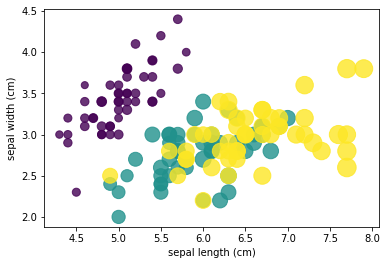

In [3]:
X = iris.data
y = iris.target

plt.figure()
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8 , s=X[:,2]*50)
plt.show()

## 1. Train Test Split

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

print('Train set:', X_train.shape)
print('Test set:', X_test.shape)

Train set: (120, 4)
Test set: (30, 4)


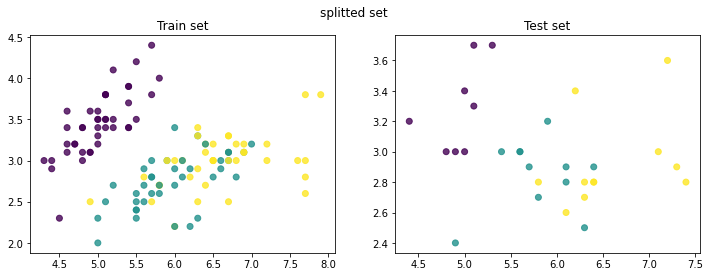

In [6]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12, 4))
fig.suptitle('splitted set')
ax1.set_title('Train set')
ax2.set_title('Test set')
ax1.scatter(X_train[:, 0], X_train[:, 1], c=y_train, alpha=0.8)
ax2.scatter(X_test[:, 0], X_test[:, 1],c=y_test, alpha=0.8);

In [7]:
from sklearn.neighbors import KNeighborsClassifier

In [8]:
model = KNeighborsClassifier(n_neighbors=6)

model.fit(X_train, y_train)

print('train score:', model.score(X_train, y_train))
print('test score:', model.score(X_test, y_test))

train score: 0.9833333333333333
test score: 0.9666666666666667


## 2. Validation Set et Cross Validation

In [9]:
from sklearn.model_selection import cross_val_score

In [10]:
model = KNeighborsClassifier()
cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

array([1.        , 1.        , 1.        , 0.95833333, 0.95833333])

In [11]:
val_score = []
for k in range(1, 50):
    score = cross_val_score(KNeighborsClassifier(k), X_train, y_train, cv=5).mean()
    val_score.append(score)

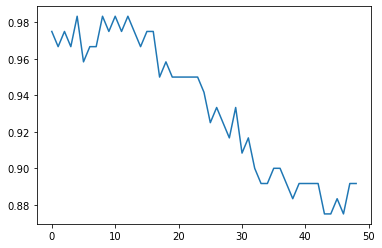

In [12]:
plt.figure()
plt.plot(val_score)
plt.show()

## 3. Validation Curve

In [13]:
from sklearn.model_selection import validation_curve

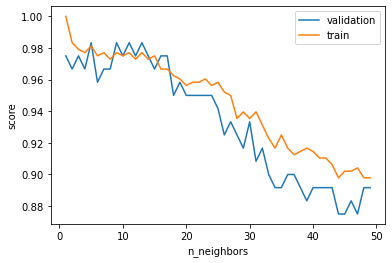

In [14]:
model = KNeighborsClassifier()
k = np.arange(1, 50)

train_score, val_score = validation_curve(model, X_train, y_train, param_name='n_neighbors', param_range= k, cv=5)
plt.figure()
plt.plot(k, val_score.mean(axis=1), label='validation')
plt.plot(k, train_score.mean(axis=1), label='train')

plt.ylabel('score')
plt.xlabel('n_neighbors')
plt.legend()
plt.show()

## 4. GridSearchCV

In [15]:
from sklearn.model_selection import GridSearchCV

In [16]:
param_grid = {'n_neighbors': np.arange(1, 20),
              'metric': ['euclidean', 'manhattan']}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)

grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [17]:
print(grid.best_score_)
print(grid.best_params_)

0.9833333333333334
{'metric': 'euclidean', 'n_neighbors': 5}


In [18]:
model = grid.best_estimator_
model.score(X_test, y_test)

0.9333333333333333

## 5. Confusion Matrix

In [19]:
from sklearn.metrics import confusion_matrix

In [20]:
confusion_matrix(y_test, model.predict(X_test))

array([[ 8,  0,  0],
       [ 0,  9,  2],
       [ 0,  0, 11]], dtype=int64)

## 6. Learning Curve

In [21]:
from sklearn.model_selection import learning_curve

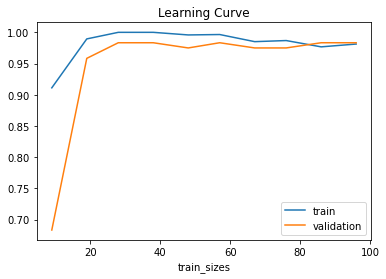

In [22]:
N, train_score, val_score = learning_curve(model, X_train, y_train,
                                           train_sizes=np.linspace(0.1, 1, 10), cv=5)

plt.figure()
plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.title('Learning Curve')
plt.xlabel('train_sizes')
plt.legend()
plt.show()